<a href="https://colab.research.google.com/github/MateoPatinoRios/MateoPati-o/blob/main/Tarea04_1007362148.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate
from scipy import optimize
import sympy
import pandas as pd

In [ ]:
v0 = 60 #Velocidad en m/s
α = np.pi #Angulo del viento
θ = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

In [ ]:
#Posicion en x
def pos_x(t, θ, v0, u, α, g, b):  
  T1 =  (u * np.cos(α))*t
  T2 =  (1./b)*(v0*np.cos(θ) - u*np.cos(α))
  T3 =  1-np.exp(-b*t)
  x = T1 + T2 * T3   
  return x

In [ ]:
#Posicion en y
def pos_y(t,θ,v0, u, α, g, b):  
  T1 = (1/b) * (g/b + v0 * np.sin(θ) - u*np.sin(α))
  T2 =  1-np.exp(-b * t)
  T3 =  (g/b - u * np.sin(α))*t
  y = T1*T2 - T3 
  return y 

In [ ]:
params = θ,v0, u, α,  g, b
t = np.linspace(0, 20, 1000)
x = pos_x(t, *params)
y = pos_y(t, *params)

Text(0, 0.5, 'y (m)')

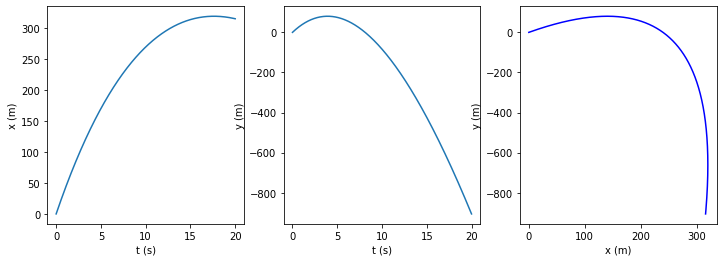

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel("t (s)")
plt.ylabel("x (m)")

plt.subplot(132)
plt.plot(t, y)
plt.xlabel("t (s)")
plt.ylabel("y (m)")

plt.subplot(133)
plt.plot(x, y,"b-")
plt.xlabel("x (m)")
plt.ylabel("y (m)")

1.Construya un diccionario con las claves "X", "Y", "Tiempo"

In [ ]:
df=pd.DataFrame({"x":x,"y":y,"t":t})
df

,x,y,t
0,0.000000,0.000000,0.00000
1,0.848652,0.846989,0.02002
2,1.695854,1.689205,0.04004
3,2.541608,2.526653,0.06006
4,3.385914,3.359336,0.08008
...,...,...,...
995,315.908872,-897.057712,19.91992
996,315.843561,-899.219473,19.93994
997,315.777714,-901.382998,19.95996
998,315.711332,-903.548284,19.97998


Determine el alcance máximo de la partícula, para ello tome la solucion teórica con y=0 , solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45°$ .

Hallar el tiempo en el que y=0 :

In [ ]:
t0=optimize.newton(pos_y,8,args=params)
print(f"El tiempo que el proyectil se demora en caer es: {t0} segundos")

El tiempo que el proyectil se demora en caer es: 8.111627022095583 segundos


In [ ]:
xmax=pos_x(t0,*params)
print(f"El alcance máximo del proyectil es: {xmax} m")

El alcance máximo del proyectil es: 239.6061494552073 m


Construya una grafica del alcance máximo R como función de $\theta$ , varie  entre 10 y 90 grados cada 5 grados.

In [ ]:
θ=list(np.linspace(10,90,17))
R=[]
for i in range(0,len(θ)):
    params = np.deg2rad(θ[i]),v0, u, α,  g, b
    t0=optimize.newton(pos_y,10,args=params)
    R.append(pos_x(t0,*params))

Text(0, 0.5, 'Alcance máximo (m)')

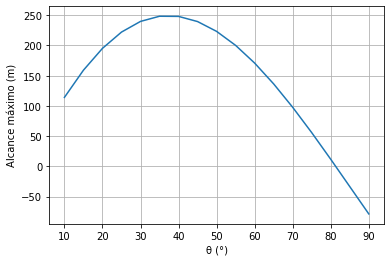

In [ ]:
plt.plot(θ,R)
plt.grid()
plt.xlabel('θ (°)')
plt.ylabel('Alcance máximo (m)')

Realice una interpolacion de R como función de $\theta$.

In [ ]:
P=interpolate.lagrange(θ,R)
Q=np.poly1d(P.coef,variable='θ')
print(f"El polinomio de interpolación de Lagrange es: R(θ)={Q}")

El polinomio de interpolación de Lagrange es: R(θ)=           16             15             14             13
5.535e-33 θ  - 6.073e-30 θ  + 3.314e-27 θ  - 1.138e-24 θ 
              12             11            10             9
 + 2.704e-22 θ  - 4.592e-20 θ  + 5.18e-18 θ  - 2.531e-16 θ
              8            7            6             5             4
 - 3.647e-14 θ + 9.69e-12 θ - 9.39e-10 θ - 2.373e-08 θ + 2.179e-05 θ
             3          2
 - 0.001791 θ - 0.1256 θ + 12.82 θ + 4.381e-07


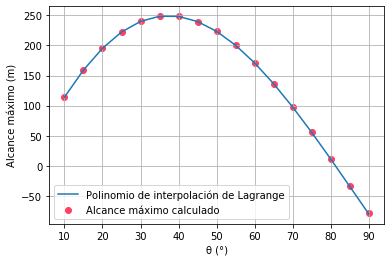

In [ ]:
plt.scatter(θ,R,c='#FF4163')
plt.plot(θ,P(θ))
plt.grid()
plt.xlabel('θ (°)')
plt.ylabel('Alcance máximo (m)')
plt.legend(['Polinomio de interpolación de Lagrange','Alcance máximo calculado'])

Con el polinomio de interpolación, hallar el $\theta_{0}$ tal que el alcance máximo sea 0, es decir, que el proyectil se lance y sólo se desplace a lo largo del eje y

In [ ]:
lr=list(Q.roots)
lr

[(208.27161139233536+202.92088620570118j),
 (208.27161139233536-202.92088620570118j),
 (248.85687282660044+0j),
 (137.79186797122767+161.5754912255681j),
 (137.79186797122767-161.5754912255681j),
 (44.88183071935524+195.68494903531595j),
 (44.88183071935524-195.68494903531595j),
 (-31.201925826622055+165.23960855504956j),
 (-31.201925826622055-165.23960855504956j),
 (163.0938473267895+38.096823271946356j),
 (163.0938473267895-38.096823271946356j),
 (-95.40357899119525+40.04279055890868j),
 (-95.40357899119525-40.04279055890868j),
 (-87.78242309408586+0j),
 (81.26144935847643+0j),
 (-3.416376813752611e-08+0j)]

De la raíces del polinomio de Lagrange sólo hay dos raíces con sentido físico

In [ ]:
θ0=float(lr[14])
print("El ángulo θ0 (ángulo crítico) que hace que no haya desplazamiento a lo largo de eje x es:",θ0,"°" )

El ángulo θ0 (ángulo crítico) que hace que no haya desplazamiento a lo largo de eje x es: 81.26144935847643 °


C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


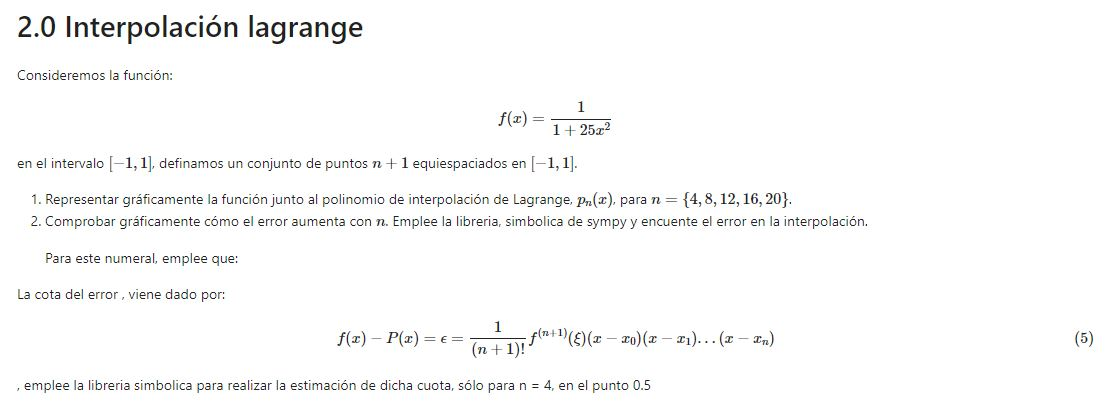

In [ ]:
from IPython.display import Image
Image("punto2.JPG")

In [ ]:
def f(x):
    return 1/(1+25*x**2)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

Text(0.5, 0, 'x')

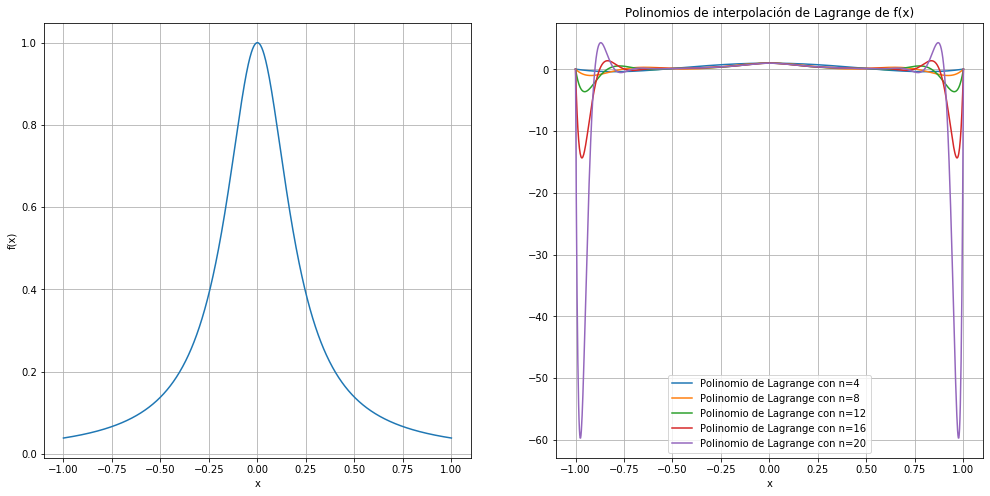

In [ ]:
plt.figure(figsize = (26,8))
plt.subplot(131)
x=np.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
for i in range(0,5):
    x=np.linspace(-1,1,4*(i+1)+1)
    P=interpolate.lagrange(x,f(x))
    x_=np.linspace(-1,1,1000)
    plt.subplot(132)
    plt.plot(x_,P(x_))
plt.subplot(132)
plt.legend(['Polinomio de Lagrange con n=4','Polinomio de Lagrange con n=8','Polinomio de Lagrange con n=12','Polinomio de Lagrange con n=16','Polinomio de Lagrange con n=20'])
plt.grid()
plt.title('Polinomios de interpolación de Lagrange de f(x)')
plt.xlabel('x')

Se evidencia el fenómeno de Runge, en los extremos (para nodos equiespaciados) el error es muy grande y aumenta con el grado del polinomio

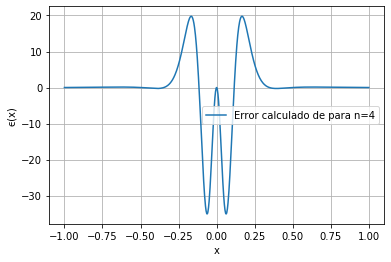

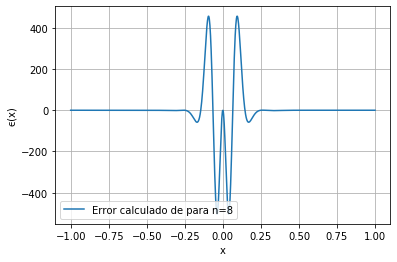

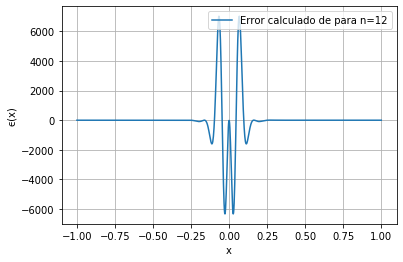

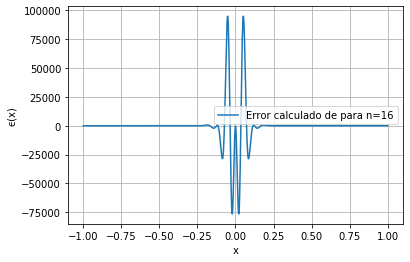

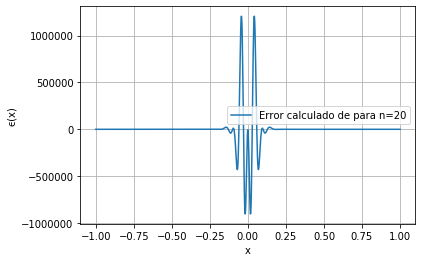

In [ ]:
import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
import math

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

plt.figure()

x = sp.symbols("x") # x será una variable simbólica
for i in range(0,5):
    n = 4*(i+1)
    fp = sp.diff(f_s(x),x,n+1)
    fpp = sp.lambdify(x,fp,'numpy') #numpy funcion
    x_ = np.linspace(-1, 1,n+1)
    def ϵ(x):
        prod=1
        for i in range(0,len(x_)):
            prod=prod*(x-x_[i])
        return fpp(x)/(math.factorial(n+1))*prod
    x1=np.linspace(-1,1,1000)
    plt.plot(x1,ϵ(x1))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('ϵ(x)')
    plt.legend([f'Error calculado de para n={n}'])
    plt.show()


Para la función de Runge, se puede evidenciar que la cota del error aumenta a medida que aumenta el grado del polinomio

In [ ]:
n=4
fp = sp.diff(f_s(x),x,5)
fpp = sp.lambdify(x,fp,'numpy') #numpy funcion
x_ = np.linspace(-1, 1,5)
def ϵ(x):
    prod=1
    for i in range(0,len(x_)):
        prod=prod*(x-x_[i])
    return fpp(x)/(math.factorial(n+1))*prod
print(f'El error calculado para x= 0.5 tomando 5 datos de interpolación (Se genera un polinomio de grado 4) es:{ϵ(0.5)}')

El error calculado para x= 0.5 tomando 5 datos de interpolación (Se genera un polinomio de grado 4) es:0.0


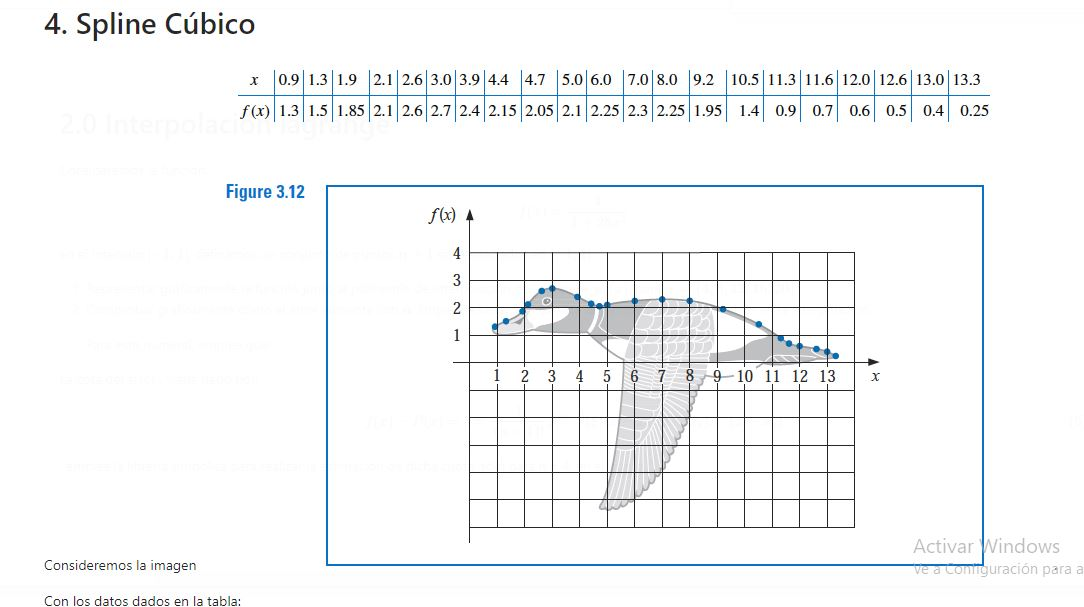

In [ ]:
from IPython.display import Image
Image("punto4.JPG")

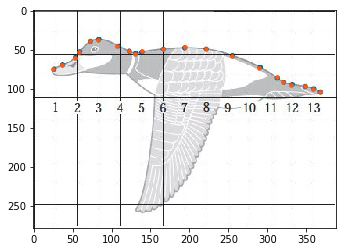

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
x=[25,36,53,58,73,83,107,122,130,139,166,194,221,254,289,312,320,330,348,358,368]
y=[75,70,60,53,39,37,45,52,55,52,49,47,49,58,73,85,92,95,97,100,104]
img = mpimg.imread('pato.JPG')
imgplot = plt.imshow(img)
plt.scatter(x,y,s=13,c="#FF5A0D")
plt.show()

In [ ]:
x=[25,36,53,58,73,83,107,122,130,139,166,194,221,254,289,312,320,330,348,358,368]
y=[75,70,60,53,39,37,45,52,55,52,49,47,49,58,73,85,92,95,97,100,104]
df=pd.DataFrame({'x':x,'y':y})
P=interpolate.lagrange(df.x,df.y)
Q=interpolate.CubicSpline(df.x,df.y)

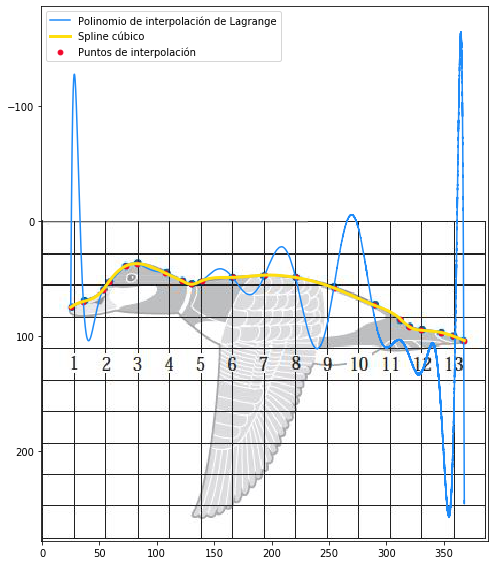

In [ ]:
plt.figure(figsize = (8,12))
img = mpimg.imread('pato.JPG')
imgplot = plt.imshow(img)
plt.scatter(x,y,s=23,c="#F2062A")
x_=np.linspace(25,368,100000)
plt.plot(x_,P(x_),c="#1E8BF9")
plt.plot(x_,Q(x_),c="#FFDE0D",linewidth=3)
plt.legend(['Polinomio de interpolación de Lagrange','Spline cúbico','Puntos de interpolación'])
plt.show()

**Se puede observar que el error de interpolación (Polinomio de Lagrange) aumenta conforme aumenta n, esto se debe a que el error es proporcional a la n-ésima más uno derivada, la cual puede tomar valores muy altos para respectivos valores (Por ejemplo los extremos del intervalo de interpolación), sin importar la distribución de los nodos**

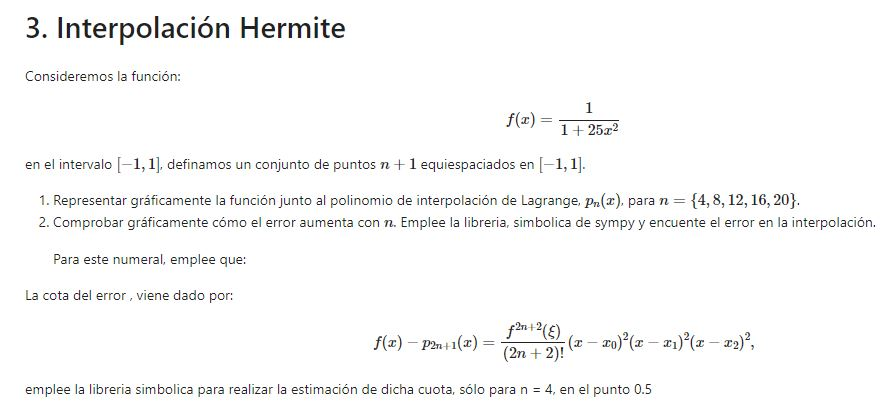

In [ ]:
from IPython.display import Image
Image("punto3.JPG")

**Python no posee alguna forma de calcular el polinomio de interpolación de Hermite tal y cómo se define:** $$H_{2n+1}(x)=f[x_{0}]+\sum_{k=1}^{2n+1}f[z_{0},...,z_{k}]\prod_{j=0}^{k-1}(x-z_{j})$$
**Es el polinomio de Hermite definido mediante diferencias divididas.
Se tiene que:**
$$f[z_{0},...,z_{k}]=\frac{f[z_{1},...,z_{k}]-f[z_{0},...,z_{k-1}]}{z_{k}-z_{0}}$$
Donde $z_{2i}=z_{2i+1}=x_{i}$ , $f[z_{i}]=f[z_{i+1}]=f(x_{i})$ y $f[z_{2i},z_{2i+1}]=f'(x_{i})$

De forma análoga se puede dividir la diferencia finita: $f[z_{0},...,z_{k}]=\frac{f[z_{1},...,z_{k}]-f[z_{0},...,z_{k-1}]}{z_{k}-z_{0}}$ como:

$$D_{k}[z_{0}]=\frac{D_{k-1}[z_{1}]-D_{k-1}[z_{0}]}{z_{k}-z_{0}}$$

Se procederá a construir el polinomio de Hermite de interpolación:

Función que me da la diferencia dividida: $D_{k}[z_{j}]$ 

*Código de las diferencias divididas suministrado por el profesor Diego Restrepo*

In [ ]:
def Dh( j, k, Zn, Yn, Ypn ):
    '''
    Se debe saber que Yn es un vector de dimensión n+1 donde Yn[i]=f'(x_{i})
    Y[i]=f(x_{i}) 
    Zn es un vector de dimensión 2n+1 donde z_{2i}=z_{2i+1}=x_{i}
    '''
    #If k+j>N
    if j+k>=len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[int(j/2)]
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:
        return Ypn[int(j/2)]
    #If higher divided difference
    else:
        return (Dh(j+1, k-1, Zn, Yn, Ypn)-Dh(j, k-1, Zn, Yn, Ypn))/(Zn[j+k]-Zn[j])

La siguiente función me calcula los coeficientes $f[z_{0},...,z_{k}]$

In [ ]:
def Hermite_interpolation_coeficients(x,y,yp):
    n=len(x)-1
    Zn=[]
    for i in range(0,len(x)):
        Zn.append(x[i])
        Zn.append(x[i])
    coef=[y[0]]
    for k in range(1,2*n+2):
        coef.append(Dh(0,k,Zn,y,yp))
    return np.array(coef),Zn

La siguiente función me da la expresión simbólica del producto: $\prod_{j=0}^{k-1}(x-z_{j})$

In [ ]:
from sympy import symbols, I, expand,lambdify,diff
def prod(j,Zn):
    x = symbols('x')
    prod=1
    for i in range(0,j+1):
        prod=prod*(x-Zn[i])
    return prod

La siguiente función me da la expresión simbólica del polinomio de interpolación de Hermite para un conjunto de datos dados

In [ ]:
def PolynomialHermiteExpression(x,y,yp):
    '''
    Me devuelve la expresión del polinomio interpolante de Hermite para la serie de datos
    (x,y) son los puntos de interpolación
    (x,yp) son los valores de la derivada de f(x) en el punto x
    '''
    coef=Hermite_interpolation_coeficients(x,y,yp)[0] #Son las diferencias divididas
    Zn=Hermite_interpolation_coeficients(x,y,yp)[1]
    suma=coef[0]
    for k in range(1,len(Zn)):
        suma+=expand(prod(k-1,Zn))*coef[k]
    return suma

Mediante lambdify podemos convetir la expresión anterior de sympy en una función evaluable de numpy

In [ ]:
#Me regresa el valor del polinomio de interpolación de Hermite evaluado en un punto en específico
def PolynomialHermite(x,y,yp):
    return lambdify('x',PolynomialHermiteExpression(x,y,yp),'numpy')
#Me regresa la derivada del polinomio de interpolación de Hermite para la serie de datos
def PolynomialHermiteDerivative(x,y,yp):
    return lambdify('x',diff(PolynomialHermiteExpression(x,y,yp),'x'),'numpy')
#Lambdify convierte una expresión simbólica de Sympy en una función evaluable de numpy

In [ ]:
def f(x):
    return 1/(1+25*x**2)

In [ ]:
#Derivada de f(x)
def fp(x):
    return -50*x/(1+25*x**2)**2

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous

Text(0.5, 0, 'x')

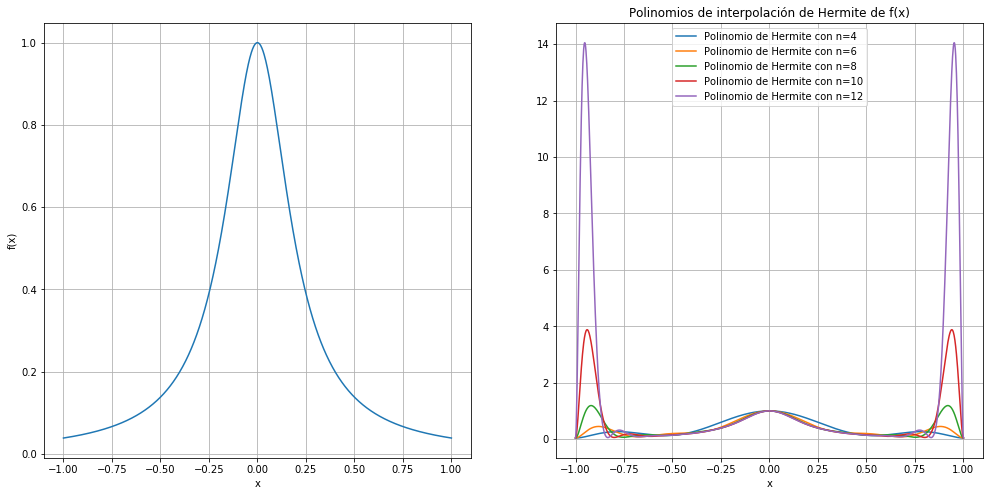

In [ ]:
plt.figure(figsize = (26,8))
plt.subplot(131)
x=np.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
for i in range(0,5):
    x=np.linspace(-1,1,4+i*2+1)
    P=PolynomialHermite(x,f(x),fp(x))
    x_=np.linspace(-1,1,1000)
    plt.subplot(132)
    plt.plot(x_,P(x_))
plt.subplot(132)
plt.legend(['Polinomio de Hermite con n=4','Polinomio de Hermite con n=6','Polinomio de Hermite con n=8','Polinomio de Hermite con n=10','Polinomio de Hermite con n=12'])
plt.grid()
plt.title('Polinomios de interpolación de Hermite de f(x)')
plt.xlabel('x')

Recordar que si se tiene n+1 datos, el polinomio de Hermite es de grado 2n+1, por ello el algoritmo es muy lento, se utilizaron los valor de $n=4,6,8,10,12.$ De forma análoga que con el polinomio de Lagrange para valores grandes de n el errori va siendo cada vez mayor. Se observa el fenómeno de Runge para estos nodos equiespaciados 

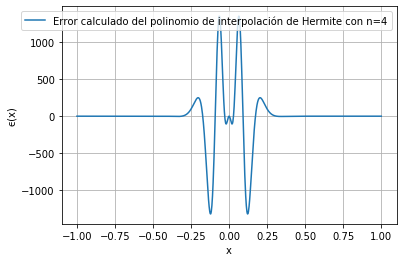

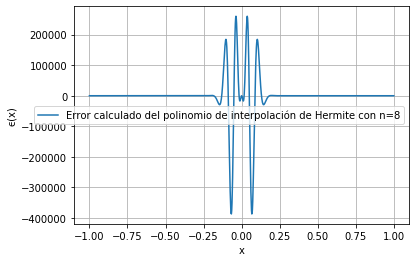

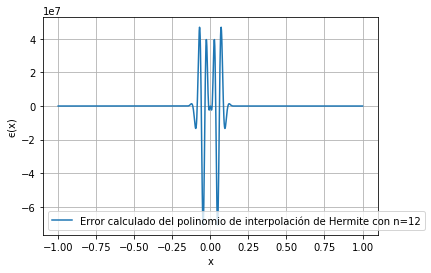

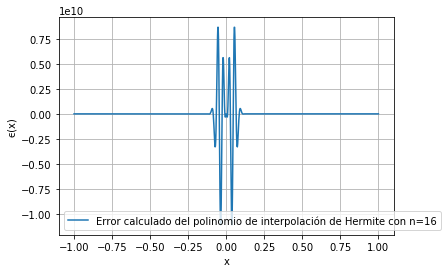

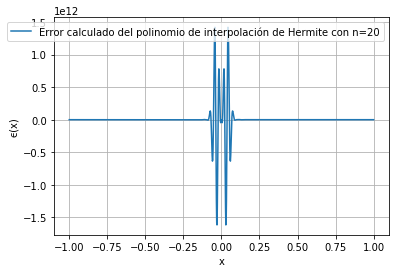

In [ ]:
import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
import math

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

plt.figure()

x = sp.symbols("x") # x será una variable simbólica
for i in range(0,5):
    n = 4*(i+1)
    fp = sp.diff(f_s(x),x,2*n+2)
    fpp = sp.lambdify(x,fp,'numpy') #numpy funcion
    x_ = np.linspace(-1, 1,n+1)
    def ϵ(x):
        prod=1
        for i in range(0,len(x_)):
            prod=prod*(x-x_[i])**2
        return fpp(x)/(math.factorial(2*n+2))*prod
    x1=np.linspace(-1,1,1000)
    plt.plot(x1,ϵ(x1))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('ϵ(x)')
    plt.legend([f'Error calculado del polinomio de interpolación de Hermite con n={n}'])
    plt.show()

Para el polinomio de Hermite de interpolación la cota del error aumenta conforme aumentan los nodos escogidos, se podrían utilizar los nodos de Chebyshev que minimizan este error, pero el fenómeno es el mismo, la cota del error siempre aumentará al aumentar el número de datos de interpolación.

In [ ]:
n=4
fp = sp.diff(f_s(x),x,5)
fpp = sp.lambdify(x,fp,'numpy') #numpy funcion
x_ = np.linspace(-1, 1,5)
def ϵ(x):
    prod=1
    for i in range(0,len(x_)):
        prod=prod*(x-x_[i])**2
    return fpp(x)/(math.factorial(2*n+2))*prod
print(f'El error calculado para x= 0.5 tomando 5 datos de interpolación (Se genera un polinomio de grado 9) es:{ϵ(0.5)}')

El error calculado para x= 0.5 tomando 5 datos de interpolación (Se genera un polinomio de grado 9) es:-0.0


In [ ]:
n = 4
x = np.linspace(-1, 1,n+1)
Q=PolynomialHermite(x,f(x),fp(x))
PolynomialHermiteExpression(x,f(x),fp(x))

In [ ]:
print(f'El error para x=0.5 es: {Q(0.5)-f(0.5)}')

El error para x=0.5 es: -1.0547118733938987e-15


## Demostración para n=4

Text(0.5, 0, 'x')

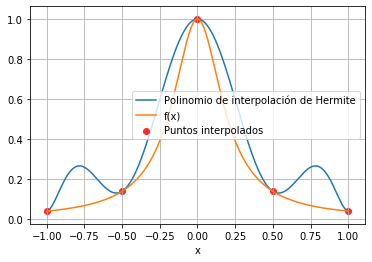

In [ ]:
x_=np.linspace(-1,1,1000)
x = np.linspace(-1, 1,n+1)
plt.scatter(x,f(x),c='#FF2929')
plt.plot(x_,Q(x_))
plt.plot(x_,f(x_))
plt.grid()
plt.legend(['Polinomio de interpolación de Hermite','f(x)','Puntos interpolados'])
plt.xlabel('x')

Text(0.5, 0, 'x')

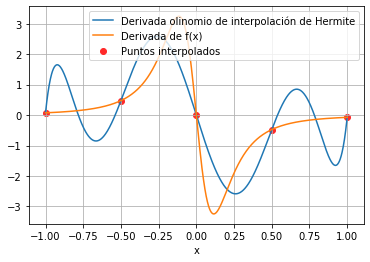

In [ ]:
x_=np.linspace(-1,1,1000)
x = np.linspace(-1, 1,n+1)
P=PolynomialHermiteDerivative(x,f(x),fp(x))
plt.scatter(x,fp(x),c='#FF2929')
plt.plot(x_,P(x_))
plt.plot(x_,fp(x_))
plt.grid()
plt.legend(['Derivada olinomio de interpolación de Hermite',"Derivada de f(x)",'Puntos interpolados'])
plt.xlabel('x')